> **Your turn now**: reduce all the science frames in ```sci_2015/```, performing bias subtraction and flat-fielding. Save the reduced images as FITS frames.

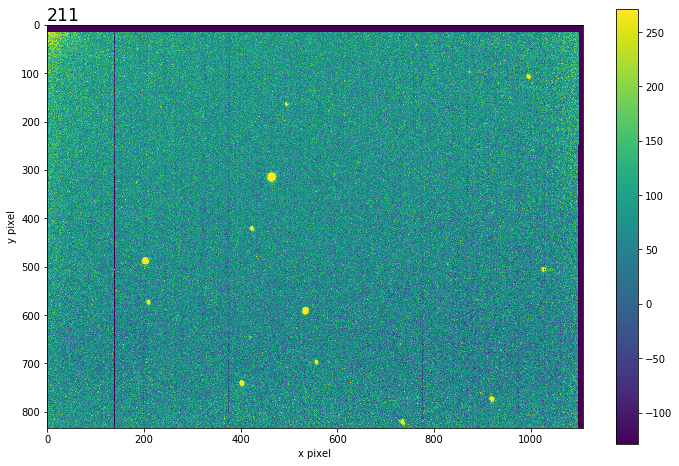

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from utils import plot_img_medrange, plot_refresh, reduce

# Load bias and flat frames
bias_arr = [fits.open('bias_3x3/CCD Image %i.fit' % i)[0] for i in range(9,17)]
flat_arr = [fits.open('flat_3x3/CCD Image %i.fit' % i)[0] for i in range(9,17)]

# Compute master bias
mbias = np.median([b.data for b in bias_arr[1:]], axis=0)

# Compute master flat
mflat = np.median([f.data-mbias for f in flat_arr], axis=0)
mflat = mflat/np.mean(mflat)

# Reduce science frames
for i in range(1,212):
    sci = fits.open('sci_2015/Autosave Image -%03i.fit' % i)[0]
    sci.data_right = np.flip(sci.data)
    sci.debiased, sci.ff = reduce(sci.data_right, mbias, mflat, flip=i>24)
    sci.data = sci.ff
    sci.writeto('sci_2015/Reduced-%03i.fits' % i, overwrite=True)
    plot_img_medrange(sci.data)
    plot_refresh(i)
    plt.show()